In [3]:
import os
import glob
import pandas as pd

# Define your bounding box (Longitude, Latitude):
minx, miny = 35.09384183303422, 31.43744033740171
maxx, maxy = 35.41310770285827, 31.754231866507496

# Path to the folder containing your yearly rain CSV files
input_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain"

# Path to the folder where we’ll save the clipped (“cut”) files
output_folder = os.path.join(input_folder, "cut_files")

# Create the output folder if it doesn’t exist
os.makedirs(output_folder, exist_ok=True)

# Glob pattern to find all CSV files in the input folder
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

# Loop over each CSV file
for csv_file in csv_files:
    print(f"Processing {csv_file}...")
    
    # Read the CSV into a pandas DataFrame
    df = pd.read_csv(csv_file)
    
    # --------------------------------------------------------------------------
    # *** Adjust these column names to match the columns in your CSV ***
    # Suppose your files have columns named "lon" and "lat" (typical).
    # If your files have "Longitude"/"Latitude" or something else, change below.
    # --------------------------------------------------------------------------
    lon_col = "longitude"
    lat_col = "latitude"
    
    # Define a mask to keep rows within the bounding box
    mask = (
        (df[lon_col] >= minx) & (df[lon_col] <= maxx) &
        (df[lat_col] >= miny) & (df[lat_col] <= maxy)
    )
    
    # Apply the mask
    df_cut = df.loc[mask].copy()
    
    # Construct an output filename
    base_name = os.path.basename(csv_file)  # e.g. "North_Dead_Sea_RM2012.csv"
    name_only, ext = os.path.splitext(base_name)  # ("North_Dead_Sea_RM2012", ".csv")
    out_filename = f"{name_only}_cut{ext}"        # "North_Dead_Sea_RM2012_cut.csv"
    out_path = os.path.join(output_folder, out_filename)
    
    # Save the filtered data
    df_cut.to_csv(out_path, index=False)
    print(f"  -> Saved clipped file to: {out_path}")

Processing /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/North_Dead_Sea_RM2012.csv...
  -> Saved clipped file to: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2012_cut.csv
Processing /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/North_Dead_Sea_RM2014.csv...
  -> Saved clipped file to: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2014_cut.csv
Processing /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/North_Dead_Sea_RM2020.csv...
  -> Saved clipped file to: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2020_cut.csv
Processing /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/North_Dead_Sea_RM2018.csv...
  -> Saved clipped file to: /media/data-ssd/PINN/DATA/model da

KeyboardInterrupt: 

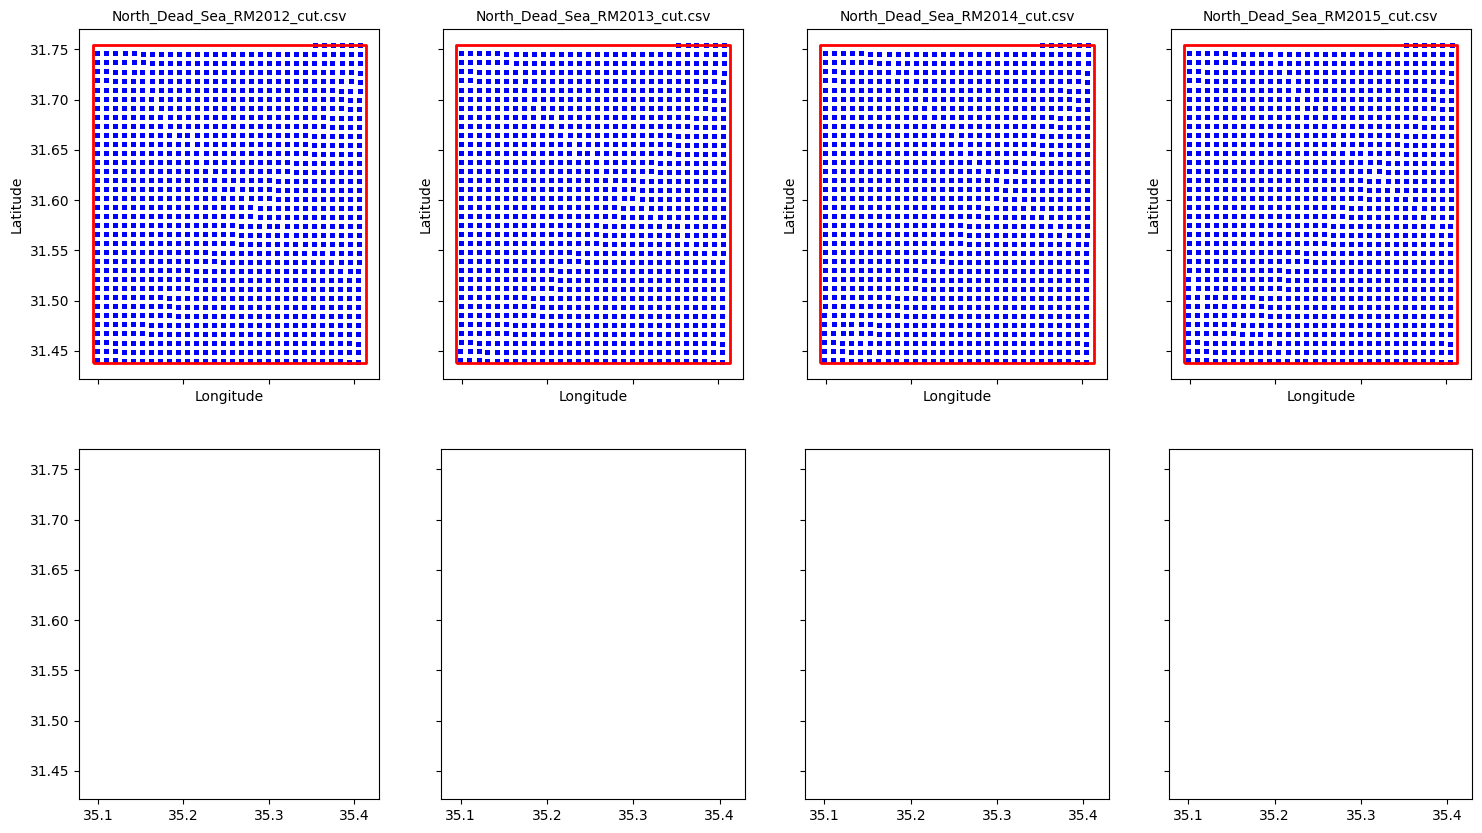

In [9]:
import os
import glob
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import numpy as np

# -------------------------
# 1) Define your bounding box (lon, lat)
# -------------------------
minx, miny = 35.09384183303422, 31.43744033740171
maxx, maxy = 35.41310770285827, 31.754231866507496

# Create a polygon for the bounding box so we can visualize it on each subplot
bbox_polygon = Polygon([
    (minx, miny),
    (maxx, miny),
    (maxx, maxy),
    (minx, maxy)
])

# -------------------------
# 2) Folder with the *clipped* CSV files
# -------------------------
cut_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files"

# Find all CSV files in that folder
csv_files = glob.glob(os.path.join(cut_folder, "*.csv"))
csv_files.sort()  # Optional: sort them alphabetically

# -------------------------
# 3) Prepare subplots
# -------------------------
n = len(csv_files)             # How many files to plot
ncols = 4                      # For example, 4 columns
nrows = math.ceil(n / ncols)   # Determine how many rows needed
fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5*nrows), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten so we can index easily

# -------------------------
# 4) Plot each file on a separate subplot
# -------------------------
for i, csv_file in enumerate(csv_files):
    # Read CSV
    df = pd.read_csv(csv_file)
    
    # -------------------------------------------------------
    # RANDOM SAMPLING: Keep ~10% of the rows (1 in 10)
    # -------------------------------------------------------
    # If the CSV is small, you might get too few points. 
    # Adjust frac=0.1 to your preference (0.2 for 20%, etc.).
    df_sampled = df.sample(frac=0.01, random_state=42)  # stable random sample
    
    # Convert to GeoDataFrame
    # Adjust column names if your CSV uses something different
    lon_col, lat_col = "longitude", "latitude"
    geometry = gpd.points_from_xy(df_sampled[lon_col], df_sampled[lat_col])
    gdf = gpd.GeoDataFrame(df_sampled, geometry=geometry, crs="EPSG:4326")
    
    ax = axes[i]  # pick the correct subplot axis

    # Plot the (sampled) points
    gdf.plot(ax=ax, marker="o", color="blue", alpha=0.5, markersize=5)
    
    # Plot the bounding box in red
    gpd.GeoSeries(bbox_polygon, crs="EPSG:4326").boundary.plot(ax=ax, color="red", linewidth=2)
    
    # Title each subplot with the file name
    file_name = os.path.basename(csv_file)
    ax.set_title(file_name, fontsize=10)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# If there are leftover subplots (e.g., if # files < nrows*ncols), remove them
for j in range(i+1, nrows*ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Selected files:
1. North_Dead_Sea_RM2013_cut.csv
2. North_Dead_Sea_RM2020_cut.csv


/home/amit/anaconda3/envs/gpu/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


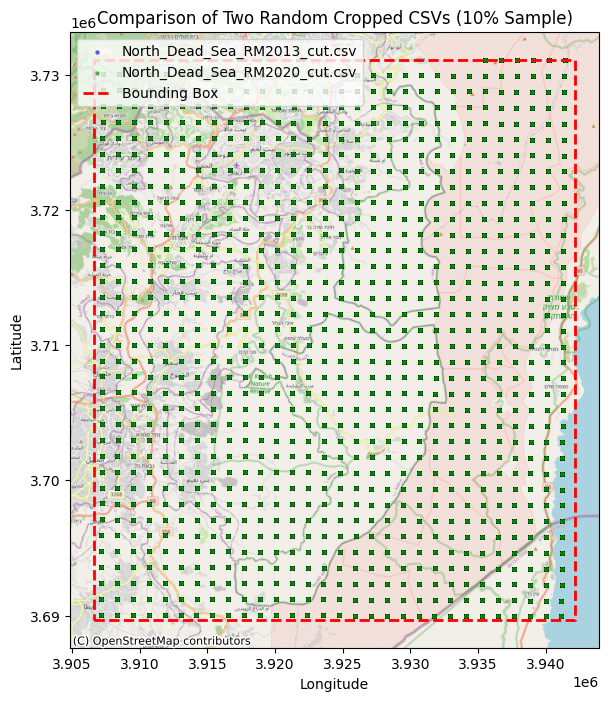

In [11]:
import os
import glob
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import contextily as ctx  # Adds a basemap
from shapely.geometry import Point, Polygon

# -------------------------
# 1) Define your bounding box (lon, lat)
# -------------------------
minx, miny = 35.09384183303422, 31.43744033740171
maxx, maxy = 35.41310770285827, 31.754231866507496

# Create a polygon for the bounding box so we can visualize it on the map
bbox_polygon = Polygon([
    (minx, miny),
    (maxx, miny),
    (maxx, maxy),
    (minx, maxy)
])

# -------------------------
# 2) Select Two Random CSV Files
# -------------------------
cut_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files"
csv_files = glob.glob(os.path.join(cut_folder, "*.csv"))

if len(csv_files) < 2:
    raise ValueError("Not enough files in the folder to select two.")

selected_files = random.sample(csv_files, 2)  # Randomly pick two files
print(f"Selected files:\n1. {os.path.basename(selected_files[0])}\n2. {os.path.basename(selected_files[1])}")

# -------------------------
# 3) Read & Process Data (Take 10% Sample)
# -------------------------
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["blue", "green"]  # Assign colors to differentiate files

for i, csv_file in enumerate(selected_files):
    df = pd.read_csv(csv_file)

    # Randomly sample 10% of the data
    df_sampled = df.sample(frac=0.1, random_state=42)

    # Convert to GeoDataFrame
    lon_col, lat_col = "longitude", "latitude"
    geometry = gpd.points_from_xy(df_sampled[lon_col], df_sampled[lat_col])
    gdf = gpd.GeoDataFrame(df_sampled, geometry=geometry, crs="EPSG:4326")

    # Convert to Web Mercator (EPSG:3857) for basemap compatibility
    gdf = gdf.to_crs(epsg=3857)

    # Plot sampled points
    gdf.plot(ax=ax, marker="o", color=colors[i], alpha=0.5, markersize=5, label=os.path.basename(csv_file))

# -------------------------
# 4) Plot Bounding Box & Basemap
# -------------------------
bbox_gdf = gpd.GeoSeries([bbox_polygon], crs="EPSG:4326").to_crs(epsg=3857)
bbox_gdf.boundary.plot(ax=ax, color="red", linewidth=2, linestyle="--", label="Bounding Box")

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # You can change the basemap provider if needed

# Finalize plot
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Comparison of Two Random Cropped CSVs (10% Sample)")
plt.show()


Selected files:
1. North_Dead_Sea_RM2014_cut.csv
2. North_Dead_Sea_RM2015_cut.csv


/home/amit/anaconda3/envs/gpu/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


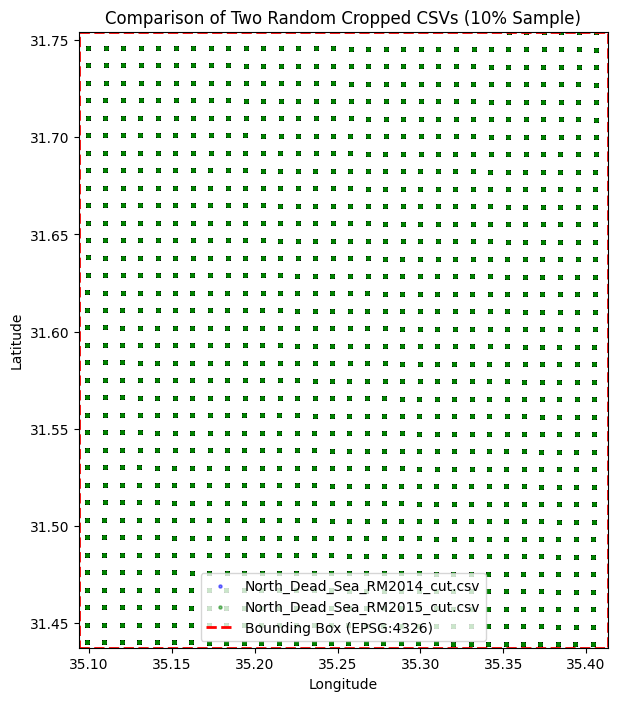

In [14]:
import os
import glob
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import contextily as ctx  # Adds a basemap
from shapely.geometry import Point, Polygon

# -------------------------
# 1) Define Bounding Box in EPSG:4326
# -------------------------
minx, miny = 35.09384183303422, 31.43744033740171
maxx, maxy = 35.41310770285827, 31.754231866507496

# Create a polygon for the bounding box (in Lat/Lon - EPSG:4326)
bbox_polygon = Polygon([
    (minx, miny),
    (maxx, miny),
    (maxx, maxy),
    (minx, maxy)
])

# Convert bounding box to GeoDataFrame
bbox_gdf = gpd.GeoDataFrame(geometry=[bbox_polygon], crs="EPSG:4326")

# -------------------------
# 2) Select Two Random CSV Files
# -------------------------
cut_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files"
csv_files = glob.glob(os.path.join(cut_folder, "*.csv"))

if len(csv_files) < 2:
    raise ValueError("Not enough files in the folder to select two.")

selected_files = random.sample(csv_files, 2)  # Randomly pick two files
print(f"Selected files:\n1. {os.path.basename(selected_files[0])}\n2. {os.path.basename(selected_files[1])}")

# -------------------------
# 3) Read & Process Data (Take 10% Sample)
# -------------------------
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["blue", "green"]  # Assign colors to differentiate files

for i, csv_file in enumerate(selected_files):
    df = pd.read_csv(csv_file)

    # ---------------------
    # Check and rename columns if necessary
    # ---------------------
    if "longitude" not in df.columns or "latitude" not in df.columns:
        raise ValueError(f"Missing 'lon' or 'lat' columns in {csv_file}. Found columns: {df.columns}")

    # Randomly sample 10% of the data
    df_sampled = df.sample(frac=0.1, random_state=42)

    # Convert to GeoDataFrame (EPSG:4326)
    geometry = gpd.points_from_xy(df_sampled["longitude"], df_sampled["latitude"])
    gdf = gpd.GeoDataFrame(df_sampled, geometry=geometry, crs="EPSG:4326")

    # Plot the data points (Before Reprojection)
    gdf.plot(ax=ax, marker="o", color=colors[i], alpha=0.5, markersize=5, label=os.path.basename(csv_file))

# -------------------------
# 4) Ensure Bounding Box is in EPSG:4326 (Don't reproject it!)
# -------------------------
bbox_gdf.boundary.plot(ax=ax, color="red", linewidth=2, linestyle="--", label="Bounding Box (EPSG:4326)")

# -------------------------
# 5) Add Basemap (AFTER CONVERTING TO EPSG:3857)
# -------------------------
ax.set_xlim([minx, maxx])
ax.set_ylim([miny, maxy])
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Comparison of Two Random Cropped CSVs (10% Sample)")

plt.legend()
plt.show()


Selected files:
1. North_Dead_Sea_RM2018_cut.csv
2. North_Dead_Sea_RM2016_cut.csv


/home/amit/anaconda3/envs/gpu/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


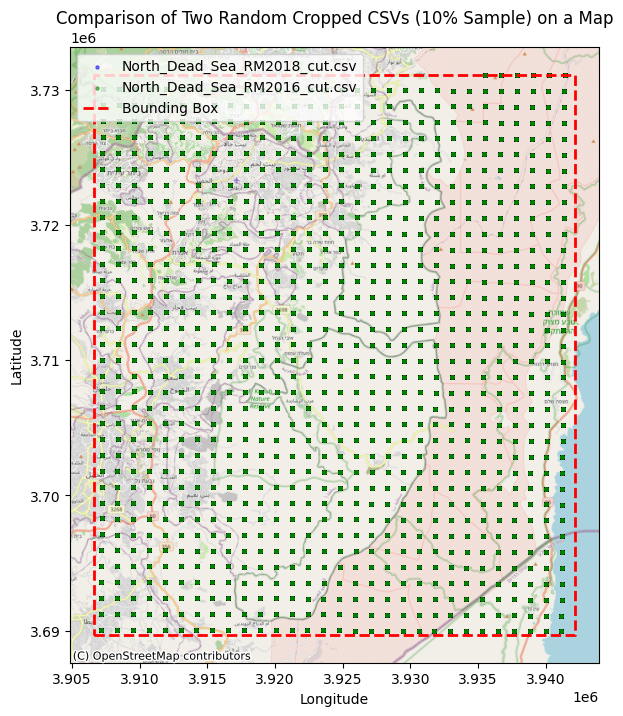

In [17]:
import os
import glob
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import contextily as ctx  # Adds a basemap
from shapely.geometry import Polygon

# -------------------------
# 1) Define Bounding Box in EPSG:4326
# -------------------------
minx, miny = 35.09384183303422, 31.43744033740171
maxx, maxy = 35.41310770285827, 31.754231866507496

# Create a polygon for the bounding box in Lat/Lon (EPSG:4326)
bbox_polygon = Polygon([
    (minx, miny),
    (maxx, miny),
    (maxx, maxy),
    (minx, maxy)
])

# Convert bounding box to GeoDataFrame
bbox_gdf = gpd.GeoDataFrame(geometry=[bbox_polygon], crs="EPSG:4326")

# -------------------------
# 2) Select Two Random CSV Files
# -------------------------
cut_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files"
csv_files = glob.glob(os.path.join(cut_folder, "*.csv"))

if len(csv_files) < 2:
    raise ValueError("Not enough files in the folder to select two.")

selected_files = random.sample(csv_files, 2)  # Randomly pick two files
print(f"Selected files:\n1. {os.path.basename(selected_files[0])}\n2. {os.path.basename(selected_files[1])}")

# -------------------------
# 3) Read & Process Data (Take 10% Sample)
# -------------------------
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["blue", "green"]  # Assign colors to differentiate files

for i, csv_file in enumerate(selected_files):
    df = pd.read_csv(csv_file)

    # ---------------------
    # Check and rename columns if necessary
    # ---------------------
    if "longitude" not in df.columns or "latitude" not in df.columns:
        raise ValueError(f"Missing 'lon' or 'lat' columns in {csv_file}. Found columns: {df.columns}")

    # Randomly sample 10% of the data
    df_sampled = df.sample(frac=0.1, random_state=42)

    # Convert to GeoDataFrame (EPSG:4326)
    geometry = gpd.points_from_xy(df_sampled["longitude"], df_sampled["latitude"])
    gdf = gpd.GeoDataFrame(df_sampled, geometry=geometry, crs="EPSG:4326")

    # Convert to Web Mercator (EPSG:3857) for basemap compatibility
    gdf = gdf.to_crs(epsg=3857)

    # Plot sampled points
    gdf.plot(ax=ax, marker="o", color=colors[i], alpha=0.5, markersize=5, label=os.path.basename(csv_file))

# -------------------------
# 4) Convert Bounding Box for Plotting
# -------------------------
bbox_gdf = bbox_gdf.to_crs(epsg=3857)  # Convert to match basemap
bbox_gdf.boundary.plot(ax=ax, color="red", linewidth=2, linestyle="--", label="Bounding Box")

# -------------------------
# 5) Add Basemap (AFTER CONVERTING TO EPSG:3857)
# -------------------------
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # You can change the basemap provider

# Finalize plot
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Comparison of Two Random Cropped CSVs (10% Sample) on a Map")

plt.show()


Selected files:
1. North_Dead_Sea_RM2013_cut.csv
2. North_Dead_Sea_RM2016_cut.csv


/tmp/ipykernel_135934/3074011797.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{x:.3f}" for x in new_xticks])
/tmp/ipykernel_135934/3074011797.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{y:.3f}" for y in new_yticks])
/home/amit/anaconda3/envs/gpu/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


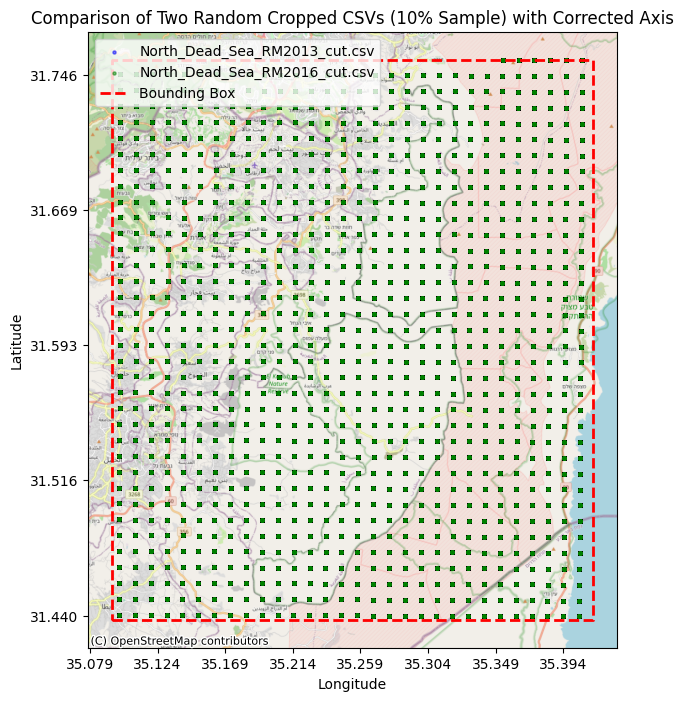

In [18]:
import os
import glob
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import contextily as ctx  # Adds a basemap
from shapely.geometry import Polygon

# -------------------------
# 1) Define your bounding box (lon, lat)
# -------------------------
minx, miny = 35.09384183303422, 31.43744033740171
maxx, maxy = 35.41310770285827, 31.754231866507496

# Create a polygon for the bounding box in EPSG:4326
bbox_polygon = Polygon([
    (minx, miny),
    (maxx, miny),
    (maxx, maxy),
    (minx, maxy)
])

# Convert bounding box to GeoDataFrame
bbox_gdf = gpd.GeoDataFrame(geometry=[bbox_polygon], crs="EPSG:4326")

# -------------------------
# 2) Select Two Random CSV Files
# -------------------------
cut_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files"
csv_files = glob.glob(os.path.join(cut_folder, "*.csv"))

if len(csv_files) < 2:
    raise ValueError("Not enough files in the folder to select two.")

selected_files = random.sample(csv_files, 2)  # Randomly pick two files
print(f"Selected files:\n1. {os.path.basename(selected_files[0])}\n2. {os.path.basename(selected_files[1])}")

# -------------------------
# 3) Read & Process Data (Take 10% Sample)
# -------------------------
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["blue", "green"]  # Assign colors to differentiate files

for i, csv_file in enumerate(selected_files):
    df = pd.read_csv(csv_file)

    # ---------------------
    # Ensure the correct column names for longitude/latitude
    # ---------------------
    lon_col, lat_col = "longitude", "latitude"
    if lon_col not in df.columns or lat_col not in df.columns:
        raise ValueError(f"Missing longitude/latitude columns in {csv_file}. Found: {df.columns}")

    # Randomly sample 10% of the data
    df_sampled = df.sample(frac=0.1, random_state=42)

    # Convert to GeoDataFrame in EPSG:4326 (lat/lon degrees)
    geometry = gpd.points_from_xy(df_sampled[lon_col], df_sampled[lat_col])
    gdf = gpd.GeoDataFrame(df_sampled, geometry=geometry, crs="EPSG:4326")

    # Convert to Web Mercator (EPSG:3857) for basemap compatibility
    gdf = gdf.to_crs(epsg=3857)

    # Plot sampled points
    gdf.plot(ax=ax, marker="o", color=colors[i], alpha=0.5, markersize=5, label=os.path.basename(csv_file))

# -------------------------
# 4) Plot Bounding Box & Basemap
# -------------------------
bbox_gdf = bbox_gdf.to_crs(epsg=3857)  # Convert bounding box for basemap overlay
bbox_gdf.boundary.plot(ax=ax, color="red", linewidth=2, linestyle="--", label="Bounding Box")

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # You can change the basemap provider

# -------------------------
# 5) Fix Axis Labels: Convert Back to Lat/Lon
# -------------------------
def transform_ticks(ax, crs_from=3857, crs_to=4326):
    """ Convert tick labels from EPSG:3857 (meters) back to EPSG:4326 (lat/lon). """
    from pyproj import Transformer
    transformer = Transformer.from_crs(crs_from, crs_to, always_xy=True)

    # Convert x-axis ticks (longitude)
    xticks = ax.get_xticks()
    new_xticks = [transformer.transform(x, ax.get_ylim()[0])[0] for x in xticks]
    ax.set_xticklabels([f"{x:.3f}" for x in new_xticks])

    # Convert y-axis ticks (latitude)
    yticks = ax.get_yticks()
    new_yticks = [transformer.transform(ax.get_xlim()[0], y)[1] for y in yticks]
    ax.set_yticklabels([f"{y:.3f}" for y in new_yticks])

# Apply the fix for proper lat/lon tick labels
transform_ticks(ax)

# -------------------------
# 6) Final Plot Adjustments
# -------------------------
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Comparison of Two Random Cropped CSVs (10% Sample) with Corrected Axis")
plt.show()


In [ ]:
Corner 1: (35.09384183303422, 31.43744033740171)
Corner 2: (35.41310770285827, 31.43744033740171)
Corner 3: (35.41310770285827, 31.754231866507496)
Corner 4: (35.09384183303422, 31.754231866507496) 

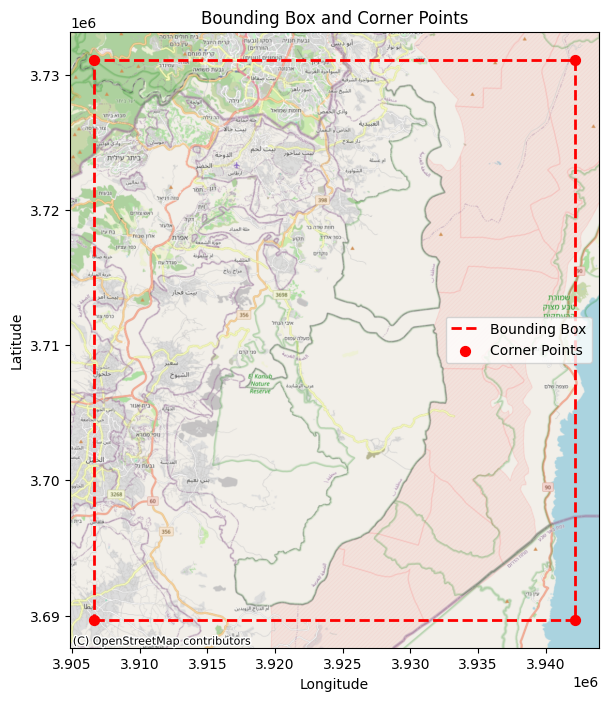

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point, Polygon

# -------------------------
# 1) Define the four corner points
# -------------------------
corners = [
    (35.09384183303422, 31.43744033740171),  # Corner 1
    (35.41310770285827, 31.43744033740171),  # Corner 2
    (35.41310770285827, 31.754231866507496), # Corner 3
    (35.09384183303422, 31.754231866507496)  # Corner 4
]

# Create a bounding box polygon
bbox_polygon = Polygon(corners)

# Convert points to a GeoDataFrame
points_gdf = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in corners], crs="EPSG:4326")

# Convert the bounding box to a GeoDataFrame
bbox_gdf = gpd.GeoDataFrame(geometry=[bbox_polygon], crs="EPSG:4326")

# Convert both to Web Mercator (EPSG:3857) for basemap compatibility
points_gdf = points_gdf.to_crs(epsg=3857)
bbox_gdf = bbox_gdf.to_crs(epsg=3857)

# -------------------------
# 2) Plot the map
# -------------------------
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the bounding box
bbox_gdf.boundary.plot(ax=ax, color="red", linewidth=2, linestyle="--", label="Bounding Box")

# Plot the four corner points
points_gdf.plot(ax=ax, marker="o", color="red", markersize=50, label="Corner Points")

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Final adjustments
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Bounding Box and Corner Points")
plt.legend()
plt.show()


In [25]:
import os
import pandas as pd
import geopandas as gpd

# ----- Configuration -----
# Folder containing the eight CSV rain files.
input_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files"

# Path to the basins shapefile.
basins_shapefile = "/media/data-ssd/PINN/DATA/basins layer/Arugot_Darga.shp"

# ----- Load the Basins Shapefile -----
basins_gdf = gpd.read_file(basins_shapefile)
print("Loaded basins shapefile:")
print(basins_gdf.head())

# Determine which column holds the basin name.
if "Name" in basins_gdf.columns:
    basin_col = "Name"
elif "basin" in basins_gdf.columns:
    basin_col = "basin"
else:
    # Fallback: choose the first non-geometry column.
    possible = [col for col in basins_gdf.columns if col != basins_gdf.geometry.name]
    if possible:
        basin_col = possible[0]
    else:
        raise ValueError("No valid basin name column found in the shapefile.")

print(f"Basin name column detected as: {basin_col}")
print("Unique basin names:", basins_gdf[basin_col].unique())

# ----- List the Input CSV Files -----
# We expect filenames ending with '_cut.csv'
csv_files = [f for f in os.listdir(input_folder) if f.endswith('_cut.csv')]
print("Found CSV files:", csv_files)

# ----- Process Each CSV File -----
for csv_file in csv_files:
    file_path = os.path.join(input_folder, csv_file)
    print(f"\nProcessing file: {file_path}")
    
    try:
        # Read CSV and parse the 'time' column as datetime.
        df = pd.read_csv(file_path, parse_dates=["time"])
    except Exception as e:
        print(f"  Error reading file {csv_file}: {e}")
        continue

    # Check for required columns.
    for col in ['longitude', 'latitude', 'rainrate']:
        if col not in df.columns:
            print(f"  Column '{col}' not found in {csv_file}. Skipping this file.")
            continue

    # Create a GeoDataFrame from the CSV data.
    try:
        gdf = gpd.GeoDataFrame(
            df,
            geometry=gpd.points_from_xy(df["longitude"], df["latitude"]),
            crs="EPSG:4326"
        )
    except Exception as e:
        print(f"  Error creating GeoDataFrame for {csv_file}: {e}")
        continue

    # Ensure both GeoDataFrames share the same CRS.
    if basins_gdf.crs != gdf.crs:
        basins_gdf = basins_gdf.to_crs(gdf.crs)
    
    # Perform spatial join: determine which basin (if any) each point falls into.
    try:
        gdf_joined = gpd.sjoin(gdf, basins_gdf[[basin_col, "geometry"]], how="left", predicate="within")
    except Exception as e:
        print(f"  Error during spatial join for {csv_file}: {e}")
        continue

    # ----- For Each Basin (Darga and Arugot) -----
    # We assume the shapefile defines two basins; iterate over each unique basin.
    unique_basins = basins_gdf[basin_col].unique()
    for basin_name in unique_basins:
        # Filter rows that fall within the current basin.
        basin_data = gdf_joined[gdf_joined[basin_col] == basin_name].copy()
        
        if basin_data.empty:
            print(f"  No data points for basin '{basin_name}' in file {csv_file}.")
            continue

        # Optionally, remove columns added during spatial join (e.g., 'index_right').
        basin_data = basin_data.drop(columns=[col for col in ['index_right'] if col in basin_data.columns])
        
        # Create an output filename.
        base_name = csv_file.replace("_cut.csv", "")
        out_file_name = f"{base_name}_{basin_name}.csv"
        out_file_path = os.path.join(input_folder, out_file_name)
        
        # Save the filtered data.
        try:
            basin_data.to_csv(out_file_path, index=False)
            print(f"  Saved {basin_name} rain file: {out_file_path}")
        except Exception as e:
            print(f"  Error saving file {out_file_name}: {e}")


Loaded basins shapefile:
   basin_c NAME_EN          area_n_en  IMS_Alert    area_n_heb  \
0    156.0  Arugot  Northern Dead Sea       12.0  ???? ?? ????   
1     28.0   Darga  Northern Dead Sea       12.0  ???? ?? ????   

                                            geometry  
0  POLYGON ((35.13125 31.64565, 35.13406 31.64265...  
1  POLYGON ((35.33467 31.65367, 35.33561 31.65012...  
Basin name column detected as: basin_c
Unique basin names: [156.  28.]
Found CSV files: ['North_Dead_Sea_RM2015_cut.csv', 'North_Dead_Sea_RM2012_cut.csv', 'North_Dead_Sea_RM2014_cut.csv', 'North_Dead_Sea_RM2019_cut.csv', 'North_Dead_Sea_RM2013_cut.csv', 'North_Dead_Sea_RM2020_cut.csv', 'North_Dead_Sea_RM2016_cut.csv', 'North_Dead_Sea_RM2018_cut.csv']

Processing file: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2015_cut.csv
  Saved 156.0 rain file: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/N

In [26]:
import os

# Define the folder containing the files
folder_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files"

# Check if the folder exists
if not os.path.exists(folder_path):
    print(f"Folder not found: {folder_path}")
else:
    # Get all files in the folder
    files = os.listdir(folder_path)

    # Loop through files and rename them
    for file_name in files:
        # Construct the new file name
        new_name = file_name.replace("156.0", "Arugot").replace("28.0", "Darga")

        # Only rename if a change occurred
        if new_name != file_name:
            old_path = os.path.join(folder_path, file_name)
            new_path = os.path.join(folder_path, new_name)

            try:
                os.rename(old_path, new_path)
                print(f"Renamed: {file_name}  →  {new_name}")
            except Exception as e:
                print(f"Error renaming {file_name}: {e}")

print("Filename changes completed.")

Renamed: North_Dead_Sea_RM2016_28.0.csv  →  North_Dead_Sea_RM2016_Darga.csv
Renamed: North_Dead_Sea_RM2020_156.0.csv  →  North_Dead_Sea_RM2020_Arugot.csv
Renamed: North_Dead_Sea_RM2016_156.0.csv  →  North_Dead_Sea_RM2016_Arugot.csv
Renamed: North_Dead_Sea_RM2019_28.0.csv  →  North_Dead_Sea_RM2019_Darga.csv
Renamed: North_Dead_Sea_RM2013_156.0.csv  →  North_Dead_Sea_RM2013_Arugot.csv
Renamed: North_Dead_Sea_RM2020_28.0.csv  →  North_Dead_Sea_RM2020_Darga.csv
Renamed: North_Dead_Sea_RM2018_156.0.csv  →  North_Dead_Sea_RM2018_Arugot.csv
Renamed: North_Dead_Sea_RM2013_28.0.csv  →  North_Dead_Sea_RM2013_Darga.csv
Renamed: North_Dead_Sea_RM2014_28.0.csv  →  North_Dead_Sea_RM2014_Darga.csv
Renamed: North_Dead_Sea_RM2015_156.0.csv  →  North_Dead_Sea_RM2015_Arugot.csv
Renamed: North_Dead_Sea_RM2015_28.0.csv  →  North_Dead_Sea_RM2015_Darga.csv
Renamed: North_Dead_Sea_RM2012_28.0.csv  →  North_Dead_Sea_RM2012_Darga.csv
Renamed: North_Dead_Sea_RM2019_156.0.csv  →  North_Dead_Sea_RM2019_Arugot.csv


Loaded: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2012_Arugot.csv


/tmp/ipykernel_135934/3793910858.py:78: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
2025-02-05 15:13:26,974 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Loaded: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files/North_Dead_Sea_RM2012_Darga.csv


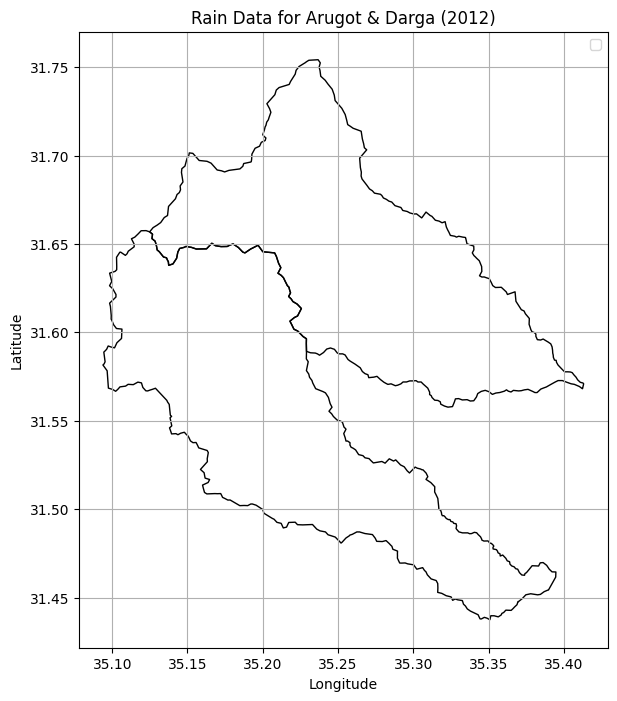

In [27]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# ----- Configuration -----
# Folder containing the created rain files
data_folder = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/yearly rain/cut_files"

# Shapefile containing the basin boundaries
basins_shapefile = "/media/data-ssd/PINN/DATA/basins layer/Arugot_Darga.shp"

# Define the filenames for 2012
arugot_file = os.path.join(data_folder, "North_Dead_Sea_RM2012_Arugot.csv")
darga_file = os.path.join(data_folder, "North_Dead_Sea_RM2012_Darga.csv")

# ----- Load Data -----
# Load the basin shapefile
basins_gdf = gpd.read_file(basins_shapefile)

# Load the rain data
def load_rain_data(file_path):
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        print(f"Loaded: {file_path}")
        return df
    else:
        print(f"File not found: {file_path}")
        return None

arugot_df = load_rain_data(arugot_file)
darga_df = load_rain_data(darga_file)

# Convert to GeoDataFrames
def convert_to_gdf(df):
    if df is not None and "long" in df.columns and "lat" in df.columns:
        return gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["long"], df["lat"]), crs="EPSG:4326")
    else:
        return None

arugot_gdf = convert_to_gdf(arugot_df)
darga_gdf = convert_to_gdf(darga_df)

# ----- Plot Data -----
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the basin boundaries
basins_gdf.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1, label="Basins")

# Plot rain points for Arugot
if arugot_gdf is not None:
    sc = arugot_gdf.plot(
        ax=ax,
        column="rainrate",
        cmap="Blues",
        markersize=5,
        legend=True,
        alpha=0.7,
        label="Arugot Rain Points"
    )

# Plot rain points for Darga
if darga_gdf is not None:
    sc = darga_gdf.plot(
        ax=ax,
        column="rainrate",
        cmap="Reds",
        markersize=5,
        legend=True,
        alpha=0.7,
        label="Darga Rain Points"
    )

# Labels and Legend
ax.set_title("Rain Data for Arugot & Darga (2012)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
